In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
survey = pd.read_csv('survey.csv')
survey[survey['Annual Income'] == 'No income/student'].groupby('Respondent').head(36)

Respondent Age Group      Annual Income How often do you travel  \
0             1     25-32  No income/student      About once a month   
1             1       NaN  No income/student      About once a month   
2             1       NaN  No income/student      About once a month   
3             1       NaN  No income/student      About once a month   
8             4     25-32  No income/student   Multiple times a year   
12            6     25-32  No income/student   Multiple times a year   
17            7     25-32  No income/student   Multiple times a year   
20            8     25-32  No income/student   Multiple times a year   
26           10     25-32  No income/student   Multiple times a year   
32           12     25-32  No income/student   Multiple times a year   
42           15     25-32  No income/student   Multiple times a year   
48           17     25-32  No income/student       About once a year   
50           18     33-41  No income/student      About once a month   
53           19     25-32  No income/student   Multiple times a year   
56           20     25-32  No income/student   Multiple times a year   
60           22     25-32  No income/student   Multiple times a year   
76           27     25-32  No income/student   Multiple times a year   
81           29     25-32  No income/student   Multiple times a year   
86           31     33-41  No income/student   Multiple times a year   
90           33     25-32  No income/student   Multiple times a year   
94           35     33-41  No income/student       About once a year   
101          38     25-32  No income/student   Multiple times a year   
105          39     25-32  No income/student   Multiple times a year   
112          41     25-32  No income/student   Multiple times a year   
115          42     25-32  No income/student   Multiple times a year   
120          44     25-32  No income/student   Multiple times a year   
126          46     25-32  No income/student   Multiple times a year   
128          47     25-32  No income/student   Multiple times a year   
141          53     25-32  No income/student       About once a year   
147          56     25-32  No income/student   Multiple times a year   
156          60     25-32  No income/student   Multiple times a year   
166          64     19-24  No income/student   Multiple times a year   
175          67     25-32  No income/student   Multiple times a year   
188          72     25-32  No income/student   Multiple times a year   
192          73     19-24  No income/student       About once a year   
195          74     19-24  No income/student       About once a year   
230          90     25-32  No income/student       About once a year   
244          95     25-32  No income/student   Multiple times a year   
252          98     25-32  No income/student   Multiple times a year   

               Regions                Type of Travel  \
0    North America/USA                      Business   
1        South America                       Tourist   
2                 Asia  Adventure/Physical challenge   
3               Europe                           NaN   
8    North America/USA                      Business   
12   North America/USA                      Business   
17   North America/USA                      Business   
20   North America/USA                       Tourist   
26   North America/USA                      Business   
32   North America/USA                       Tourist   
42                Asia                      Business   
48   North America/USA                       Tourist   
50   North America/USA                      Business   
53   North America/USA                       Tourist   
56   North America/USA                      Business   
60   North America/USA                      Business   
76   North America/USA                       Tourist   
81   North America/USA                       Tourist   
86   North America/USA                      Business   
90  

In [4]:
#survey[survey['Type of Travel'] == 'Adventure/Physical challenge'].groupby('Respondent').head()

In [5]:
sum_rank = np.sum(survey, axis = 0) #lower sum means higher rank from 1-5
sum_rank

Respondent           12657.0
Quality                193.0
Cost                   233.0
Access                 211.0
Language barrier       342.0
Filing paperwork       416.0
dtype: float64

In [6]:
#Adventure Travel
#survey['Type of Travel'].unique()
len(survey[survey['Type of Travel'] == 'Adventure/Physical challenge'].groupby('Respondent'))


24

In [7]:
survey = survey.fillna(method='ffill')

In [8]:
adventure = survey[(survey['Type of Travel'] == 'Adventure/Physical challenge') & (survey['Quality'] != 0.0)]

In [9]:
ranks = adventure[['Respondent', 'Quality', 'Cost ', 'Access  ', 'Language barrier', 'Filing paperwork ']]
np.sum(ranks, axis = 0)
#adventure.columns

Respondent           1145.0
Quality                51.0
Cost                   65.0
Access                 48.0
Language barrier       96.0
Filing paperwork      115.0
dtype: float64

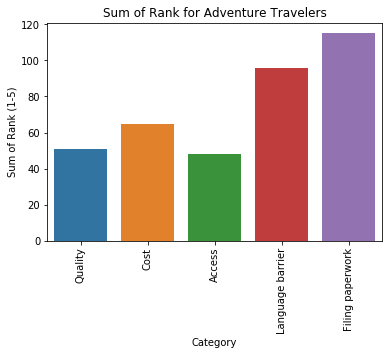

In [10]:
#Plots rank given to 5 categories for travelers in the adventure/physical type of travel
#lower number = higher rank; Access is number one priority
sns.barplot(x=['Quality', 'Cost', 'Access', 'Language barrier', 'Filing paperwork'], y=[51, 65, 48, 96, 115])
plt.xlabel('Category')
plt.ylabel('Sum of Rank (1-5)')
plt.title('Sum of Rank for Adventure Travelers')
plt.xticks(rotation=90)
plt.show();

In [38]:
ranking = survey[survey['Quality'] != 0.0][['Respondent','Quality', 'Cost ', 'Access  ', 'Language barrier', 'Filing paperwork ']].groupby('Respondent').agg(max)#.agg(sum)

In [39]:
ranking

Quality  Cost   Access    Language barrier  Filing paperwork 
Respondent                                                               
1               2.0    4.0       1.0               3.0                5.0
2               2.0    3.0       1.0               5.0                4.0
3               2.0    1.0       3.0               4.0                5.0
4               3.0    1.0       2.0               4.0                5.0
5               1.0    2.0       3.0               5.0                4.0
...             ...    ...       ...               ...                ...
95              2.0    1.0       3.0               4.0                5.0
96              4.0    3.0       1.0               2.0                5.0
97              2.0    1.0       3.0               4.0                5.0
99              2.0    1.0       3.0               4.0                5.0
100             3.0    2.0       1.0               5.0                4.0

[93 rows x 5 columns]

In [40]:
np.sum(ranking, axis = 0)

Quality              194.0
Cost                 234.0
Access               212.0
Language barrier     343.0
Filing paperwork     416.0
dtype: float64

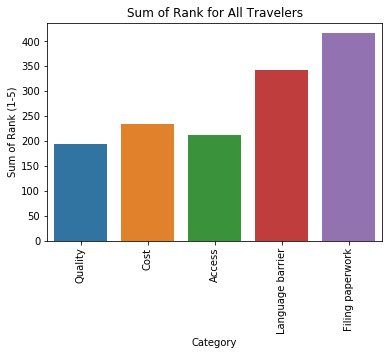

In [42]:
#Plots rank given to 5 categories for all travelers
#lower number = higher rank; Quality is number one priority
sns.barplot(x=['Quality', 'Cost', 'Access', 'Language barrier', 'Filing paperwork'], y=[194, 234, 212, 343, 416])
plt.xlabel('Category')
plt.ylabel('Sum of Rank (1-5)')
plt.title('Sum of Rank for All Travelers')
plt.xticks(rotation=90)
plt.show();